In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings

warnings.filterwarnings("ignore")


In [180]:
con=sqlite3.connect(r"C:\Users\19408\Pictures\Flight_Price_resources\password_data.sqlite")

In [181]:
data=pd.read_sql_query("SELECT * FROM Users",con)

In [182]:
data.shape

(100000, 3)

In [183]:
data.head(4)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2


In [184]:
data.isnull().any()

index       False
password    False
strength    False
dtype: bool

In [185]:
data.drop(['index'],axis=1,inplace=True)

In [186]:
data.head(4)

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2


In [187]:
data.isnull().any().sum()

0

In [188]:
data.dtypes

password    object
strength     int64
dtype: object

In [189]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

In [190]:
data['password']

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [191]:
data[data["password"].str.isnumeric()].shape

(26, 2)

In [192]:
data[data["password"].str.isalpha()].shape

(50, 2)

In [193]:
data[data["password"].str.isalnum()].shape


(97203, 2)

In [194]:
data[data["password"].str.istitle()].shape

(932, 2)

In [195]:
import string

In [196]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [197]:
def find_semantics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [198]:
data["password"].apply(find_semantics)==1

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [199]:
data.columns

Index(['password', 'strength'], dtype='object')

In [200]:
data['length']=data['password'].str.len()

In [201]:
data['length']

0         9
1        12
2         9
3        23
4         8
         ..
99995    10
99996    10
99997     9
99998     9
99999    11
Name: length, Length: 100000, dtype: int64

In [202]:
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

In [203]:
def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

In [204]:
def freq_numerical_case(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [205]:
data['lowercase_freq']=np.round(data['password'].apply(freq_lowercase),3)
data['uppercase_freq']=np.round(data['password'].apply(freq_uppercase),3)
data['digit_freq']=np.round(data['password'].apply(freq_numerical_case),3)

In [206]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq'],
      dtype='object')

In [207]:
data.head(3)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222


In [208]:
def freq_special_case(row):
    return len([char for char in row if not char.isalpha() and not char.isdigit()])/len(row)

In [209]:
data['SPecial_char_freq']=np.round(data['password'].apply(freq_special_case),3)

In [210]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,SPecial_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000
2,soporte13,1,9,0.778,0.0,0.222,0.000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043
4,c443balg,1,8,0.625,0.0,0.375,0.000


In [211]:
data['SPecial_char_freq']=data['SPecial_char_freq']/data['length']

In [212]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,SPecial_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.00000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.00000
2,soporte13,1,9,0.778,0.0,0.222,0.00000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.00187
4,c443balg,1,8,0.625,0.0,0.375,0.00000


In [213]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
strength,100000.0,0.988730,0.510926,0.0,1.000,1.000,1.000,2.000000
length,100000.0,9.986700,2.887813,1.0,8.000,9.000,11.000,220.000000
lowercase_freq,100000.0,0.615026,0.220644,0.0,0.500,0.667,0.778,1.000000
uppercase_freq,100000.0,0.053537,0.153889,0.0,0.000,0.000,0.000,1.000000
digit_freq,100000.0,0.327797,0.198814,0.0,0.188,0.300,0.400,1.000000
SPecial_char_freq,100000.0,0.000332,0.003041,0.0,0.000,0.000,0.000,0.222333


In [214]:
data[['length','strength']].groupby(['strength']).agg(["min","max","mean","median"])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [215]:
cols=data.columns

In [216]:
cols=['length','lowercase_freq','uppercase_freq','digit_freq', 'SPecial_char_freq']

In [217]:
for col in cols:
    print(col)
    print(data[[col,'strength']].groupby(['strength']).agg(["min","max","mean","median"]))
    print("\n")

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


digit_freq
         digit_freq                        
                min    max      mean median
strength                                   
0   

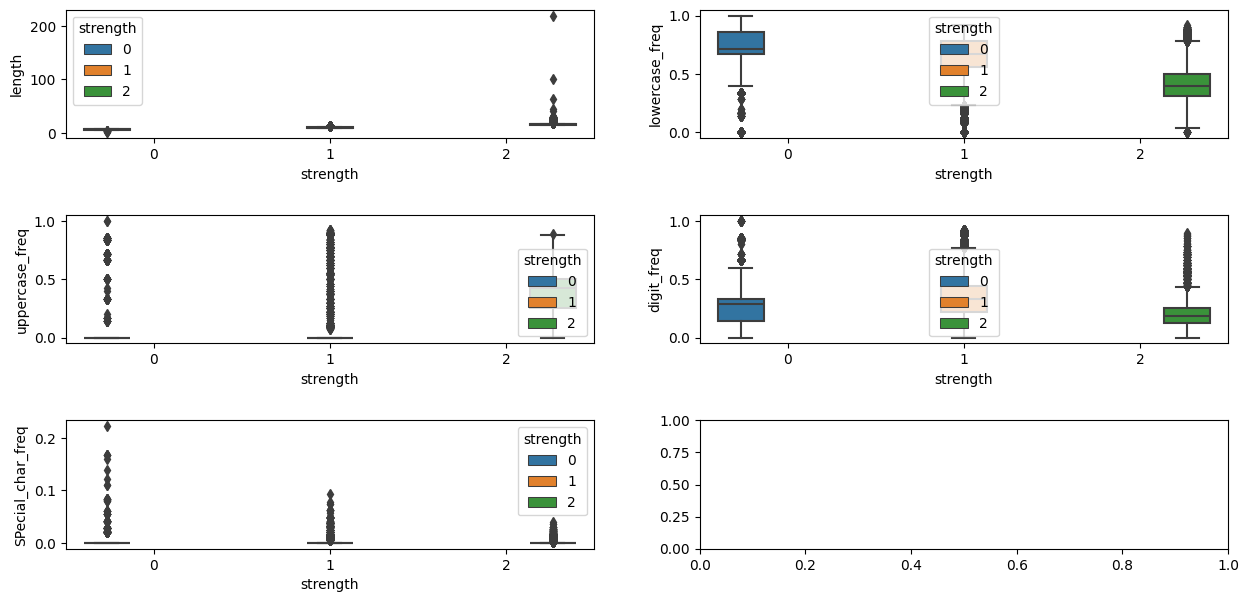

In [218]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(3,2,figsize=(15,7))
sns.boxplot(x="strength",y='length', hue="strength",ax=ax1,data=data)
sns.boxplot(x="strength",y='lowercase_freq', hue="strength",ax=ax2,data=data)
sns.boxplot(x="strength",y='uppercase_freq', hue="strength",ax=ax3,data=data)
sns.boxplot(x="strength",y='digit_freq', hue="strength",ax=ax4,data=data)
sns.boxplot(x="strength",y='SPecial_char_freq', hue="strength",ax=ax5,data=data)
plt.subplots_adjust(hspace=0.6)

In [219]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'SPecial_char_freq'],
      dtype='object')

In [220]:
def get_dist(data,feature):
    plt.subplot(1,2,1)
    sns.violinplot(x='strength',y=feature,data=data)
    plt.subplot(1,2,2)
    sns.distplot(data[data['strength']==0][feature],color="red",label="0",hist=False)
    sns.distplot(data[data['strength']==1][feature],color="blue",label="1",hist=False)
    sns.distplot(data[data['strength']==2][feature],color="orange",label="2",hist=False)

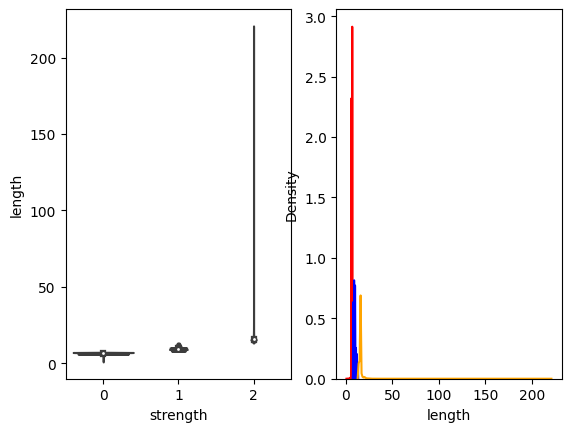

In [221]:
get_dist(data,"length")


In [222]:
data.columns


Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'SPecial_char_freq'],
      dtype='object')

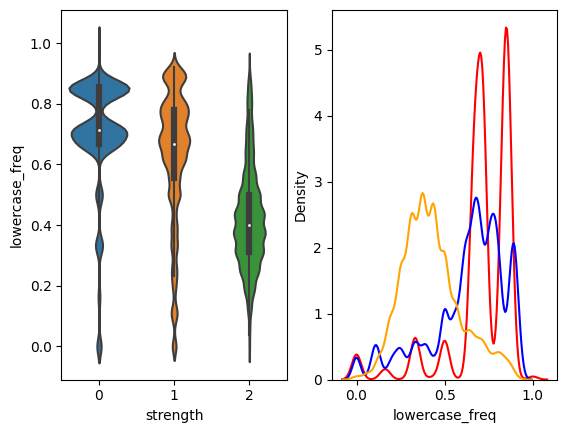

In [223]:
get_dist(data,'lowercase_freq')

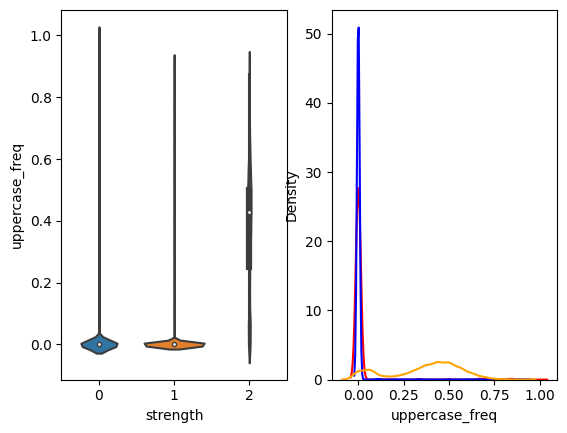

In [224]:
get_dist(data , 'uppercase_freq')

In [225]:
##Applying TF_IDF on data

In [226]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,SPecial_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.00000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.00000
2,soporte13,1,9,0.778,0.0,0.222,0.00000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.00187
4,c443balg,1,8,0.625,0.0,0.375,0.00000


In [227]:
##shuffling randomly for robust model
dataframe=data.sample(frac=1)

In [228]:
dataframe

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,SPecial_char_freq
42738,killer3883,1,10,0.600,0.0,0.400,0.000000
64390,auntarworm1,1,11,0.909,0.0,0.091,0.000000
11146,janjua5154588.,2,14,0.429,0.0,0.500,0.005071
45086,qwertyma123,1,11,0.727,0.0,0.273,0.000000
71678,ola123asd,1,9,0.667,0.0,0.333,0.000000
...,...,...,...,...,...,...,...
35702,callofduty1,1,11,0.909,0.0,0.091,0.000000
81691,tocojj13,1,8,0.750,0.0,0.250,0.000000
75803,1gtnzhjlby,1,10,0.900,0.0,0.100,0.000000
8447,keisha101,1,9,0.667,0.0,0.333,0.000000


In [229]:
x=list(dataframe["password"])

In [230]:
##using tf_idf vectorizer to convert text to numerical data
from sklearn.feature_extraction.text import TfidfVectorizer

In [231]:
vectorizer=TfidfVectorizer(analyzer="char")

In [232]:
X=vectorizer.fit_transform(x)

In [233]:
X.shape

(100000, 99)

In [234]:
dataframe["password"].shape

(100000,)

In [235]:
type(X)

scipy.sparse._csr.csr_matrix

In [236]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [237]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.477054  , 0.        ,
       0.        , 0.        , 0.        , 0.53895548, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.20766875, 0.        , 0.        , 0.        ,
       0.21519601, 0.        , 0.27450734, 0.51126711, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.23614086,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [238]:
dataframe["password"]

42738        killer3883
64390       auntarworm1
11146    janjua5154588.
45086       qwertyma123
71678         ola123asd
              ...      
35702       callofduty1
81691          tocojj13
75803        1gtnzhjlby
8447          keisha101
65084        ultraslan1
Name: password, Length: 100000, dtype: object

In [239]:
vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [240]:
len(vectorizer.get_feature_names_out())

99

In [241]:
df2=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())

In [242]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [243]:
##Applying ML algorithms

In [244]:
dataframe.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'SPecial_char_freq'],
      dtype='object')

In [245]:
df2["length"]=dataframe['length']
df2["lowercase_freq"]=dataframe['lowercase_freq']

In [246]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [247]:
y=dataframe["strength"]

In [248]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df2,y,test_size=0.20)

In [249]:
X_train.shape

(80000, 101)

In [250]:
y_train.shape

(80000,)

In [251]:
from sklearn.linear_model import LogisticRegression

In [252]:
##Applying multinomial logistic regression as we have data with 3 output categories
clf=LogisticRegression(multi_class="multinomial")

In [253]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [254]:
y_pred=clf.predict(X_test)

In [255]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [256]:
from collections import Counter
Counter(y_pred)

Counter({1: 16913, 2: 1643, 0: 1444})

In [257]:
##checkinhg predictions using user_inputs

In [258]:
password="%@1-)^r23abcd"
sample_array=np.array([password])
sample_matrix=vectorizer.transform(sample_array)
sample_matrix.toarray()
sample_matrix.toarray().shape
[char for char in password if char.islower()]
len([char for char in password if char.islower()])/len(password)
np.append(sample_matrix.toarray(),(9,0.444)).shape

(101,)

In [259]:
np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.46980252, 0.        , 0.        , 0.45899773,
        0.        , 0.        , 0.34910717, 0.        , 0.        ,
        0.        , 0.09373181, 0.10844316, 0.12145681, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.31849139, 0.        , 0.        , 0.        , 0.47541203,
        0.        , 0.        , 0.09026709, 0.15132188, 0.14138691,
        0.13596087, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.1202418 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [260]:
np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101).shape

(1, 101)

In [261]:
new_matrix = np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101)

In [262]:
clf.predict(new_matrix)

array([0], dtype=int64)

In [351]:
def predict():
    password = input("Enter a password : ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)
    
    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)
    
    new_matrix2 = np.append(sample_matrix.toarray() , (length_pass , length_normalised_lowercase)).reshape(1,101)
    result = clf.predict(new_matrix2)
    
    if result == 0 :
        return "Password is weak"
    elif result == 1 :
        return "Password is normal"
    else:
        return "password is strong"

In [353]:
predict()

Enter a password :  !@#123rtyyERT4


'password is strong'